In [97]:
import tensorflow as tf
from platform import python_version 
print(python_version())

3.7.3


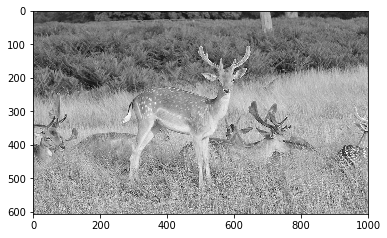

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/fan_5/OneDrive/Documents/Animals_with_Attributes2/JPEGImages"

CATEGORIES = ["antelope", "cow"]

for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap="gray")
            plt.show()
            break
        break

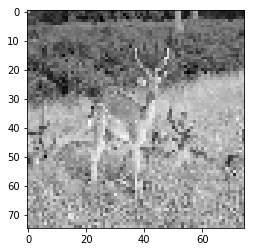

(75, 75)

In [99]:
IMG_SIZE = 75

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()
#cv2.imwrite("test2.jpg", new_array)
new_array.shape

In [100]:
training_data = []

def create_training_data():
    
    for category in CATEGORIES:
        count = 0
        path = os.path.join(DATADIR, category)
        class_number = CATEGORIES.index(category)
        for img in os.listdir(path):
            if (count < 1000):
            #try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_number])
                count = count + 1
                
            else: break    
            #except Exception as e:
             #   pass
            
create_training_data()

In [101]:
print(len(training_data))

2000


In [102]:
import random

random.shuffle(training_data)

In [103]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
1
1
1
1
0


In [146]:
training_images = []
training_labels = []
test_images = []
test_labels = []

In [147]:
for image, label in training_data:
    training_images.append(image)
    training_labels.append(label)
    
training_images = np.array(training_images).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

In [121]:
import pickle

pickle_out = open("training_images.pickle", "wb")
pickle.dump(training_images,pickle_out)
pickle_out.close()

pickle_out = open("training_labels.pickle", "wb")
pickle.dump(training_labels,pickle_out)
pickle_out.close()

In [122]:
pickle_in = open("training_images.pickle", "rb")
training_images = pickle.load(pickle_in)

pickle_in = open("training_labels.pickle", "rb")
training_labels = pickle.load(pickle_in)

In [123]:
training_labels[5]

1

In [109]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

import pickle

pickle_in = open("training_images.pickle","rb")
training_images = pickle.load(pickle_in)

pickle_in = open("training_labels.pickle","rb")
training_labels = pickle.load(pickle_in)

#training_labels = to_categorical(training_labels)

training_images = training_images/255.0

print(training_images.shape[1:])

#model = Sequential([
    #keras.layers.Flatten(input_shape=(50, 50)),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    #keras.layers.Dense(5, activation=tf.nn.softmax)
#])

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=training_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(training_images, training_labels, batch_size=32, epochs=30, validation_split=0.1)



(75, 75, 1)
Train on 1800 samples, validate on 200 samples
Epoch 1/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.5882 - acc: 0.6800 - val_loss: 0.4180 - val_acc: 0.8850
Epoch 2/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.4312 - acc: 0.8178 - val_loss: 0.3733 - val_acc: 0.8650
Epoch 3/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.3948 - acc: 0.8289 - val_loss: 0.3599 - val_acc: 0.8600
Epoch 4/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.3728 - acc: 0.8422 - val_loss: 0.3769 - val_acc: 0.8550
Epoch 5/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.3665 - acc: 0.8444 - val_loss: 0.3854 - val_acc: 0.8050
Epoch 6/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.3469 - acc: 0.8500 - val_loss: 0.4187 - val_acc: 0.8450
Epoch 7/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.3565 - acc: 0.8461 - val_loss: 0.3497 - val_a

In [110]:
def predict(a):
    x = (training_images[a])
    x = np.expand_dims(x, axis=0)
    prediction = model.predict_classes(x)[0][0]
    
    print(prediction)
    
    if prediction == training_labels[a]:
        print("Prediction is correct")
        
    else:
        print("Prediction is incorrect")
    
predict(1)

0
Prediction is correct


In [111]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      noisy = np.expand_dims(noisy, axis=0)
      return noisy
    elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
        
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
      out[coords] = 0
      return out
    elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      noisy = np.expand_dims(noisy, axis=0)
      return noisy
    elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      noisy = np.expand_dims(noisy, axis=0)
      return noisy

In [149]:
#model.predict_classes(abs(noisy("poisson", training_images[1])))
test_image = noisy("gauss", training_images[1]).astype("uint8")
#np.squeeze(test_image).shape
test_image.shape
cv2.imwrite("test4.jpg", np.squeeze(test_image))
model.predict_classes(test_image)[0][0]
#inputarray = test_image[...,np.newaxis]
#inputarray.shape
#model.predict_classes(inputarray)
#training_images[1].shape
#training_images[1]

0

In [137]:
adv_images = []
for i in range(len(training_images)):    
    test1_image = noisy("gauss", training_images[i]).astype("uint8")
    result = model.predict_classes(test1_image)[0][0]
    
    if(result != training_labels[i]):
        cv2.imwrite(".\\adversarial_test_images\\_train_adv_" + str(i) + ".jpg", np.squeeze(test1_image))
        #adv_images.append([test_image, training_labels[1]])

In [37]:
adv_images_images = [a_i[0] for a_i in adv_images]
adv_images_labels = [a_i[1] for a_i in adv_images]
#adv_images_images[1]
adv_images_labels[1]
#np.savez('data.npz', x_tr=training_images, y_tr=training_labels, x_te=adv_images_images, y_te=adv_images_labels)

0

In [67]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.objectives import categorical_crossentropy
from keras.models import Sequential
from scipy.misc import imresize
import numpy as np
import theano
import sys

def downsample(x,p_down):
    size = len(imresize(x[0].reshape(75,75),p_down,mode='F').ravel())
    s_tr = np.zeros((x.shape[0], size))
    for i in range(x.shape[0]):
      img = x[i].reshape(75,75)
      s_tr[i] = imresize(img,p_down,mode='F').ravel()
    return s_tr

def MLP(d,m,q):
    model = Sequential()
    model.add(Dense(m, input_shape=d, activation="relu"))
    model.add(Dense(m, activation="relu"))
    model.add(Dense(q))
    model.add(Activation('sigmoid'))
    model.compile('rmsprop','binary_crossentropy')
    return model

def softmax(w, t = 1.0):
    e = np.exp(w / t)
    return e/np.sum(e,1)[:,np.newaxis]

def weighted_loss(base_loss,l):
    def loss_function(y_true, y_pred):
        return l*base_loss(y_true,y_pred)
    return loss_function

'''
def distillation(d,m,q,t,l):
    graph = Graph()
    graph.add_input(name='x', input_shape=(d,))
    graph.add_node(Dense(m), name='w1', input='x')
    graph.add_node(Activation('relu'), name='z1', input='w1')
    graph.add_node(Dense(m), name='w2', input='z1')
    graph.add_node(Activation('relu'), name='z2', input='w2')
    graph.add_node(Dense(q), name='w3', input='z2')
    graph.add_node(Activation('softmax'), name='hard_softmax', input='w3')
    graph.add_node(Activation('softmax'), name='soft_softmax', input='w3')
    graph.add_output(name='hard', input='hard_softmax')
    graph.add_output(name='soft', input='soft_softmax')
    loss_hard = weighted_loss(categorical_crossentropy,1.-l)
    loss_soft = weighted_loss(categorical_crossentropy,t*t*l)
    graph.compile('rmsprop', {'hard':loss_hard, 'soft':loss_soft})
    return graph
'''
def distillation(d,m,q,t,l):
    model = Sequential()
    model.add(name='x', input_shape=(d,))
    model.add(Dense(m), name='w1', input='x')
    model.add(Activation('relu'), name='z1', input='w1')
    model.add(Dense(m), name='w2', input='z1')
    model.add(Activation('relu'), name='z2', input='w2')
    model.add(Dense(q), name='w3', input='z2')
    model.add(Activation('softmax'), name='hard_softmax', input='w3')
    model.add(Activation('softmax'), name='soft_softmax', input='w3')
    model.add_output(name='hard', input='hard_softmax')
    model.add_output(name='soft', input='soft_softmax')
    loss_hard = weighted_loss(categorical_crossentropy,1.-l)
    loss_soft = weighted_loss(categorical_crossentropy,t*t*l)
    model.compile('rmsprop', {'hard':loss_hard, 'soft':loss_soft})
    return graph
def load_data(filepath):
  d = np.load(filepath, 'r')
  x_tr = d['x_tr'].astype(np.float32)  
  x_te = d['x_te'].astype(np.float32)
  y_tr = d['y_tr'].astype(np.float32)
  y_te = d['y_te'].astype(np.float32)
  return x_tr, y_tr, x_te, y_te


In [78]:
'''np.random.seed(0)

#ax_tr, ay_tr, x_te, y_te = load_data("C:/Users/fan_5/data.npz")
ax_tr = np.asarray(training_images).astype(np.float32)
ay_tr = np.asarray(training_labels).astype(np.float32)
x_te = np.asarray(adv_images_images).astype(np.float32)
y_te = np.asarray(adv_images_labels).astype(np.float32)



p_downsample = 25
print(sys.argv)
N = 1 #int(sys.argv[1])
M = 20

outfile = open('result' + str(N), 'w')

xs_te = downsample(x_te,p_downsample)
x_te  = x_te/255.0
xs_te = xs_te/255.0

print (xs_te.shape)
print (ax_tr.shape[0])
for rep in range(10):
  # random training split
  i     = np.random.permutation(ax_tr.shape[0])
  x_tr  = ax_tr[i]
  y_tr  = ay_tr[i]
  xs_tr = downsample(x_tr,p_downsample)
  x_tr  = x_tr/255.0
  xs_tr = xs_tr/255.0
  
  # big mlp
  print(x_tr.shape)
  print(y_tr.shape)
  print(x_te.shape)

  mlp_big = MLP(x_tr.shape[1],M,y_tr.shape[0])
  mlp_big.fit(x_tr, y_tr, epochs=50, verbose=0)
  err_big = np.mean(mlp_big.predict_classes(x_te,verbose=0)==np.argmax(y_te,1))
  
  # student mlp
  for t in [1,2,5,10,20,50]:
    for L in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
      soften = theano.function([mlp_big.layers[0].input], mlp_big.layers[2].get_output(train=False))
      ys_tr  = softmax(soften(x_tr),t)
      
      mlp_student = distillation(xs_tr.shape[1],M,ys_tr.shape[1],t,L)
      mlp_student.fit({'x':xs_tr, 'hard':y_tr, 'soft':ys_tr}, epochs=50, verbose=0)
      err_student = np.mean(np.argmax(mlp_student.predict({'x':xs_te})['hard'],1)==np.argmax(y_te,1))
      
      line = [N, p_downsample, round(err_big,3), t, L, round(err_student,3)]
      outfile.write(str(line)+'\n')

outfile.close()''''

['C:\\Users\\fan_5\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\fan_5\\AppData\\Roaming\\jupyter\\runtime\\kernel-dcb86870-b250-4ca9-9e82-d01598cd5b11.json']
(919, 324)
2000


C:\Users\fan_5\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fan_5\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


(2000, 75, 75, 1)
(2000,)
(919, 1, 75, 75, 1)


TypeError: 'int' object is not iterable